# Music Genre Classification 
### by @fcacharelli and @mdtc

In [1]:
#install Speech lib

#import pip

#package_names=['python_speech_features'] #packages to install
#pip.main(['install'] + package_names + ['--upgrade']) # --upgrade to install or update existing packages

#pip install python_speech_features #in case of not having it installed 

## 1. Import Libraries

In [2]:
# Import libraries 

from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load DataSet

In [6]:
###   READ CSV FILES WITH DATA   ####

features = pd.read_csv("features.csv")
genres = pd.read_csv("genres.csv")

# Genres dictionary
genresDic = {
    1: "Blues",
    2: "Classical",
    3: "Country",
    4: "Disco",
    5: "Hip Hop",
    6: "Jazz",
    7: "Metal",
    8: "Pop",
    9: "Reggae",
    10: "Rock"
}

In [7]:
# Prepare Dataset

#directory = os.path.dirname(os.path.realpath("MLMusicGenre")) + "\\data"
#f= open("genres.dat" ,'wb')
#i=0
#for folder in os.listdir(directory):
#    i+=1
#    if i==11 :
#        break   
#    for file in os.listdir(directory+"\\"+folder):  
#        (rate,sig) = wav.read(directory+"\\"+folder+"\\"+file)
#        mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
#        covariance = np.cov(np.matrix.transpose(mfcc_feat))
#        mean_matrix = mfcc_feat.mean(0)
#        feature = (mean_matrix , covariance , i)
#        pickle.dump(feature , f)
#f.close() 

In [8]:
# Load Dataset

#def loadDataSet(fileName):
#    with open(fileName, "rb") as f:
#        while True:
#            try:
#                dataset.append(pickle.load(f))
#            except EOFError:
#                f.close()
#                break
    
#dataset=[]
#loadDataSet("genres.dat")

In [9]:
# Convert to Pandas Data Frame

#dataset = pd.DataFrame(dataset)

In [10]:
# Target Class (genres)

#genres = dataset[2]

In [11]:
# Deploy features in Data Frame (df)

#column_names = ["F"+str(i) for i in range(0, 182)]

#df = pd.DataFrame(columns = column_names)

#for i in range(0,1000):
#    array = []
#    for j in range(0,13):
#        array.append(dataset.iloc[i][0][j])
#        for h in range(0,13):
#            array.append(dataset.iloc[i][1][j][h])
#    df=df.append(dict(zip(df.columns, array)), ignore_index=True)

In [12]:
# Save Data Frame to CSV for later use

#compression_opts = dict(method='zip',
#                        archive_name='out.csv')  
#df.to_csv('out.zip', index=False,
#          compression=compression_opts)  

#compression_opts = dict(method='zip',
#                        archive_name='out.csv')  
#genres.to_csv('out.zip', index=False,
#          compression=compression_opts)  

## 3. Standardize Scale

In [13]:
def standardize(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaledData = scaler.transform(data)
    return pd.DataFrame(scaledData, columns=data.columns[:])

In [14]:
df_feat = standardize(features)
df_feat

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F172,F173,F174,F175,F176,F177,F178,F179,F180,F181
0,0.270973,-0.127847,0.722965,0.656796,-0.615857,-0.148250,-0.564720,-0.408985,0.102941,-0.109106,...,-0.739966,0.135703,0.295860,-0.785628,-0.762488,-0.140165,-0.608138,0.337143,0.282861,-0.614068
1,-0.714168,0.261696,-0.482031,0.414503,-2.652460,-0.786573,-1.329539,-2.900857,0.894233,-1.019298,...,-0.052732,-1.241419,-0.489888,1.264134,0.629181,-0.137173,-0.771948,-0.214311,-0.359266,0.209481
2,0.504779,-0.073998,-0.088273,-0.207069,-0.510054,0.290802,0.203097,-0.529806,-0.146074,-0.472069,...,1.056673,-1.384661,-0.103685,-0.008762,-0.756548,-0.132411,0.009954,0.234618,-2.015009,-0.010838
3,-0.738413,0.069474,-0.486758,0.761254,0.044534,-1.514468,-0.471734,-1.034673,-0.913166,-0.572799,...,-0.186965,-1.606036,-0.541326,0.971464,0.204211,-0.234535,-0.432736,-0.286641,-1.157078,-0.452965
4,-0.195277,0.089357,-1.187554,-0.320837,1.874467,-1.243936,1.796846,1.802900,1.151487,-1.641215,...,-1.185515,-1.206998,0.875194,0.990349,-0.268946,-1.543012,0.996920,0.545979,-1.017532,0.573965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.048603,-0.177711,0.064313,0.556490,-0.169722,0.229966,0.182351,-0.164457,-0.318256,-0.273025,...,-0.164699,-0.726277,-0.534927,-0.412745,-0.260562,-0.554906,-0.996470,0.035648,1.048687,0.212329
996,0.009827,-0.103922,-0.096967,0.479393,-0.192720,0.123183,-0.203838,-0.300958,-0.983380,-0.276451,...,-0.124281,-0.113861,0.070178,0.109582,0.075008,0.083156,0.068300,0.407974,-0.608246,-1.241892
997,0.173850,-0.195034,0.139803,0.476668,-0.313193,0.437053,0.277001,0.349994,0.383720,-0.197373,...,1.389437,-0.237918,0.699850,-0.198866,-0.321658,0.477405,-0.747616,-0.160213,-0.265182,-0.410179
998,-0.849552,0.335393,-0.648573,-1.396481,-1.082275,1.561251,2.224351,1.056659,0.521143,0.963748,...,0.400214,-0.059095,-0.031555,-0.103718,0.341030,0.431600,0.262041,-0.135034,-0.148325,-0.381238


## 4. Features Reduction PCA

In [15]:
# Cast array to DataFrame

from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

pca.fit(df_feat)

df_pca = pca.transform(df_feat)

df_features = pd.DataFrame(df_pca)

df_features

,0,1,2,3,4,5,6,7
0,-3.393699,-0.123293,-2.170201,-1.412958,0.644749,1.176844,1.908876,0.485776
1,1.403737,0.710085,-5.125939,-3.796145,2.524375,-0.430657,2.072378,1.794379
2,-3.033875,0.639661,-1.688196,-2.536817,0.715213,0.781753,0.769957,-0.636172
3,2.787330,-2.387093,-1.472121,-2.807563,2.776052,-0.621704,1.776057,0.238822
4,-4.828420,1.592636,-0.594267,0.061196,3.356662,-4.145212,-2.096207,-2.400902
...,...,...,...,...,...,...,...,...
995,-4.063661,0.091418,0.152017,-1.688214,-0.203274,0.571339,1.814380,-0.053607
996,-3.592952,-3.616846,-0.133395,-2.879351,1.056881,0.788202,-1.140993,-0.505845
997,-3.845813,-1.528401,1.220904,-2.658986,-0.956340,0.022853,-0.738130,-0.059974
998,-2.808613,2.036018,1.482378,-2.590368,-1.085209,-0.595415,0.333735,1.332753


## 5.  Split data

In [26]:
# Use train_test_split to split randomly, having 30% of the data for testing.

X = df_features
y = genres

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 6. Apply KNN Model

In [29]:
# Instance of the classifier with k=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1) .ravel will convert that array shape to (n, )
pred = knn.predict(X_test)

## 7. Evaluate

In [30]:
# Confusion Matrix and Classification Report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0  3  2  0  2  0  0  1  1]
 [ 0 33  1  1  0  5  0  0  0  0]
 [ 1  1 10  6  1  0  0  2  1  6]
 [ 4  0  2  9  1  0  2  3  0  8]
 [ 4  0  0  2 16  0  1  4  3  0]
 [ 1  5  1  0  0 16  0  0  1  0]
 [ 3  1  0  1  1  0 21  0  0  5]
 [ 0  0  2  6  0  1  0 17  0  0]
 [ 1  0  3  2  6  0  1  1 22  1]
 [ 3  1  3  6  0  1  4  4  1  7]]
              precision    recall  f1-score   support

           1       0.47      0.62      0.54        24
           2       0.80      0.82      0.81        40
           3       0.40      0.36      0.38        28
           4       0.26      0.31      0.28        29
           5       0.64      0.53      0.58        30
           6       0.64      0.67      0.65        24
           7       0.72      0.66      0.69        32
           8       0.55      0.65      0.60        26
           9       0.76      0.59      0.67        37
          10       0.25      0.23      0.24        30

    accuracy                           0.55       300
   macro avg       

##  8. Optimize

In [83]:
# Iterate the model for different k values and calculate Error Rates 
error_rate = []

for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test.values.ravel())) # Mean of boolean array, 1: mistake, 0: right

Text(0, 0.5, 'Error Rate')

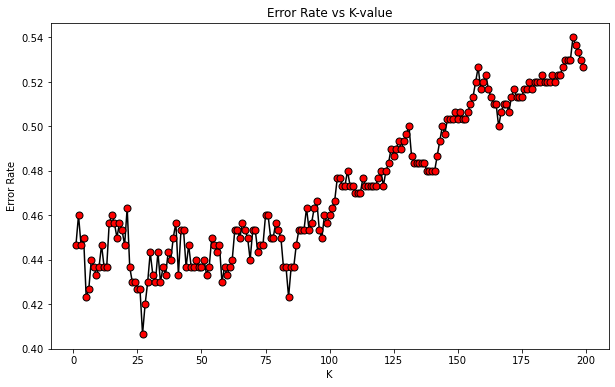

In [32]:
# Plot error rates to optimize k value

plt.figure(figsize=(10,6))
plt.plot(range(1,200), error_rate, color="black", linestyle="-", marker="o", markerfacecolor="red", markersize=7)
plt.title("Error Rate vs K-value")
plt.xlabel("K")
plt.ylabel("Error Rate")

## 9. Choose K-value
We will use k=1 ??????????????????????????????

In [33]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)


print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[17  0  4  1  0  0  2  0  0  0]
 [ 0 33  2  0  0  4  0  0  1  0]
 [ 3  2 13  3  0  1  0  3  0  3]
 [ 1  0  1 12  0  1  6  5  0  3]
 [ 2  0  0  2 13  2  2  3  5  1]
 [ 0 12  0  0  0 10  1  1  0  0]
 [ 2  0  0  0  0  2 27  0  0  1]
 [ 0  0  1  1  0  0  0 23  1  0]
 [ 2  0  3  0 13  3  0  1 14  1]
 [ 3  2  0  7  1  0  6  1  0 10]]


              precision    recall  f1-score   support

           1       0.57      0.71      0.63        24
           2       0.67      0.82      0.74        40
           3       0.54      0.46      0.50        28
           4       0.46      0.41      0.44        29
           5       0.48      0.43      0.46        30
           6       0.43      0.42      0.43        24
           7       0.61      0.84      0.71        32
           8       0.62      0.88      0.73        26
           9       0.67      0.38      0.48        37
          10       0.53      0.33      0.41        30

    accuracy                           0.57       300
   macro avg     

## 10. Test Model

In [34]:
# Load Song, add it to the raw data and then standardize it all together

def loadSong(file, data):
    (rate,sig)=wav.read(file)
    mfcc_feat=mfcc(sig,rate,nfft=int(rate/31.25),winlen=0.020,appendEnergy=False)
    covariance = np.cov(np.matrix.transpose(mfcc_feat))
    mean_matrix = mfcc_feat.mean(0)
    feature=(mean_matrix,covariance,0)
    
    array = []
    for j in range(0,13):
        array.append(feature[0][j])
        for h in range(0,13):
            array.append(feature[1][j][h])
    return standardize(data.append(dict(zip(data.columns, array)), ignore_index=True))

In [113]:
# PCA to uploaded song
# importing Statistics module

'''We dont have to train the model again, thats already done on step 6

    Our problem still being the data. As long as we dont know what is the meaning of each feature 
    we will keep selecting the wrong characteristics. 
    
    Our incoming array/dataframe: from the uploaded song must be a single row with the selected PCA features.
    
    In this case I tried with the mean, standard deviation and Max of the resultant array from the function loadSong() 
    but did not made a difference. 
    
    The model keeps throwing a prediction 6 jazz for all songs. 


'''


df = loadSong("beethoven.wav", features)

pca_song = pca.transform(df)

NewSong_df = pd.DataFrame(pca_song).describe()

PredSong = NewSong_df.loc[['mean']]
print(PredSong)
knn.predict(PredSong)
print("This song is probably not", genresDic[pred[0]])
print(pred)

                 0             1             2             3             4  \
mean -2.812713e-16  6.423988e-16  9.494015e-17  1.557196e-16 -2.009714e-16   

                 5             6             7  
mean -5.212835e-17  5.856121e-17  2.832677e-16  
This song is probably not Jazz
[6]


In [79]:
# Use all data to train and only the last row to test (last row is the testing song features)

#xTrain = df.iloc[:-1]
#yTrain = genres
#xTest = df.iloc[-1:]

In [41]:
# Try for different k values

#for i in range(1,50):
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(xTrain,yTrain.values.ravel())
#    pred = knn.predict(xTest) #Transpose
#    print(genresDic[pred[0]])


